In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import string
import datetime
plt.rcParams['figure.figsize'] = 18,9


#Creating dictionary for file name
### Important***
#Just place the files in the below specified location ONLY
str2 = 'D:\\Data files\\Final Data\\'
cap = []
loc = []
for u in os.listdir(str2):
    loc.append(u)
    df2 = pd.read_excel(str2 + u)
    cap.append(df2.SchemeType[0])
dict2 = dict(zip(cap, loc))

#Funtion for presenting Ranking
#Rank
def Rank(type1):
    df6 = pd.read_excel(str2 + dict2[type1])
    df6 = df6.drop(0)
    df6.index = range(len(df6))
    df6 = df6.drop(axis = 1, columns = ['Rank'])
    df6 = df6.drop_duplicates(subset=None, keep='first', inplace=False)
    df6.index = range(len(df6))
    list9 = []
    for j in range(len(df6)):
        list9.append(j+1)
    se = pd.Series(list9)
    df6['Rank'] = se
    return df6[['SchemeCode', 'Banks', 'FundType', 'SchemeName', 'SchemeType', 'Number', 'Mean', 'Std', 'Beta', 'Sharpe_ratio', 'Rank']]

#Benchmark Data
def Benchmark(type1):
    df6 = pd.read_excel(str2 + dict2[type1])
    list4 = []
    for j in range(1,len(df6)):
        list4.append(j)
    df6 = df6.drop(list4)
    df6.index = range(len(df6))
    return df6[['SchemeCode', 'Banks', 'FundType', 'SchemeName', 'SchemeType', 'Number', 'Mean', 'Std', 'Beta', 'Sharpe_ratio']]

#Function for making plots

#Creating dates
day = 1
month = 0
year = 2014
date = []
for j in range(0,60):
    month = month + 1
    if month < 13:
        da = str(day) + '-' + str(month) + '-' + str(year)
        date.append(da)
    else :
        year = year + 1
        month = 1
        da = str(day) + '-' + str(month) + '-' + str(year)
        date.append(da)

def Graph(code, type1):
    list3 = []
    list1 = []
    str2 = 'D:\\Data files\\Final Data\\'
    df2 = pd.read_excel(str2 + dict2[type1])
    target = df2[df2.SchemeCode == code]
    target.index = range(len(target))
    for l in range(4,65):
        list3.append(df2.iat[0,l])
    m = df2.iat[0,65]
    n = target.iat[0,65]
    no = min(m,n)
    for k in range(4,65):
        list1.append(target.iat[0,k])
    list2 = list3[1:(no+1)]
    list1 = list1[1:(no+1)]
    
    #Graph
    builds = date[0:no]
    y_stack = np.row_stack((list1, list2)) 
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(builds, y_stack[0,:], label= target.SchemeName[0], color='Red', marker='o')
    ax1.plot(builds, y_stack[1,:], label= df2.FundType[0], color='Blue', marker='s')
    plt.xticks(builds, rotation = 'vertical', size = 12)
    plt.xlabel('Dates', size = 18)
    plt.ylabel('Monthly Return  (%)', size = 18)
    handles, labels = ax1.get_legend_handles_labels()
    lgd = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(1.20,1))
    ax1.grid('on')
    return plt

In [289]:
cap
#pick up scheme type from here

['Multi Cap Fund',
 'Large Cap Fund',
 'Focussed Fund',
 'ELSS',
 'Large & Mid Cap Fund',
 'Mid Cap Fund',
 'Small Cap Fund',
 'Dividend Yield Fund',
 'Value Fund',
 'Contra Fund']

In [290]:
#Instructions
#(**Very important)
#Place the files at this location - 'D:\\Data files\\Final Data\\'

#Function no. 1 -
#Rank('Scheme type')
##USE - Provides ranking of the mutual funds in the input scheme category using Sharpe ratio
###(Input is SCHEME TYPE, put exact scheme type from the above output list)


#Function no. 2 - 
#Benchmark('Scheme type') 
##USE - Provides benchmark data of the mutual funds in the input scheme category
###(Input is scheme type, put exact scheme type from the above output list)


#(For individual fund analysis of a fund)
#Function no. 3 - 
#Graph('Scheme Code', 'Scheme type')
##USE - Provides graphical representation of return of a particular fund and compares it with its benchmark
###(Input is SCHEME CODE of the fund and the SCHEME TYPE of the fund)
###(SCHEME CODE can be found in the datasheet provided by using the 'Rank' function)


#An illustration is provided below

In [291]:
#Note- The spelling of the input should be same as the above names in the list of scheme type
Rank('Multi Cap Fund')

,SchemeCode,Banks,FundType,SchemeName,SchemeType,Number,Mean,Std,Beta,Sharpe_ratio,Rank
0,129046,Motilal Oswal Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Motilal Oswal Multicap 35 Fund (MOF35)-Direct ...,Multi Cap Fund,56,1.859044,4.468291,0.024552,0.288301,1
1,129048,Motilal Oswal Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Motilal Oswal Multicap 35 Fund (MOF35)-Regular...,Multi Cap Fund,56,1.777304,4.462849,0.022452,0.270336,2
2,129047,Motilal Oswal Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Motilal Oswal Multicap 35 Fund (MOF35)- Direct...,Multi Cap Fund,56,1.711098,4.442269,0.016052,0.256685,3
3,120823,Quant Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Quant Active Fund-GROWTH OPTION-Direct Plan,Multi Cap Fund,60,1.648186,4.449418,0.898683,0.242133,4
4,100631,Quant Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Quant Active Fund-GROWTH OPTION,Multi Cap Fund,60,1.630270,4.446463,0.898220,0.238265,5
5,129049,Motilal Oswal Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Motilal Oswal Multicap 35 Fund (MOF35)-Regular...,Multi Cap Fund,56,1.624255,4.441975,0.013767,0.237152,6
6,118825,Mirae Asset Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Mirae Asset India Equity Fund - Direct Plan - ...,Multi Cap Fund,60,1.598145,4.359281,0.955288,0.235661,7
7,120166,Kotak Mahindra Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,Kotak Standard Multicap Fund - Growth - Direct,Multi Cap Fund,60,1.618009,4.461825,0.967960,0.234697,8
8,120381,ICICI Prudential Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,ICICI Prudential MidCap Fund - Direct Plan - ...,Multi Cap Fund,60,1.795265,5.248784,1.039749,0.233279,9
9,119718,SBI Mutual Fund,Open Ended Schemes ( Equity Scheme - Multi Cap...,SBI Magnum Multicap Fund - DIRECT PLAN - Growt...,Multi Cap Fund,60,1.596005,4.453393,0.955153,0.230200,10


In [294]:
Benchmark('Multi Cap Fund')

,SchemeCode,Banks,FundType,SchemeName,SchemeType,Number,Mean,Std,Beta,Sharpe_ratio
0,0,0,Nifty500,Benchmark,Multi Cap Fund,60,1.223744,4.49209,1.0,0.145347


<module 'matplotlib.pyplot' from 'C:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

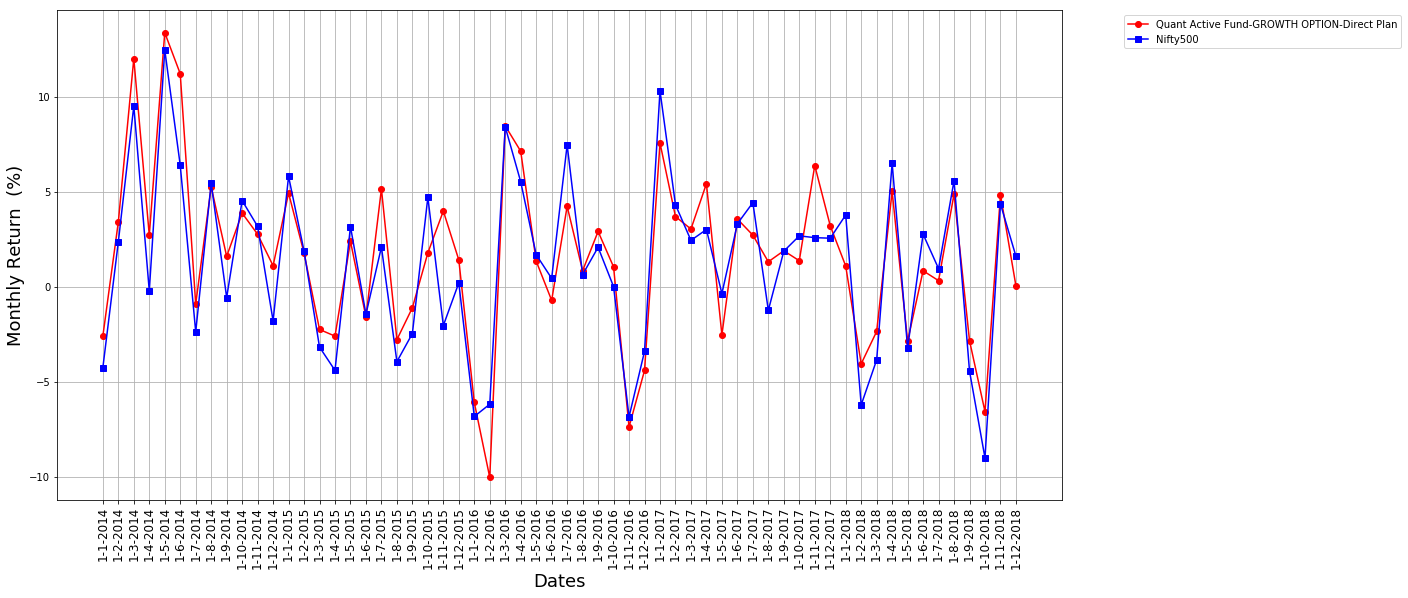

In [295]:
#Graphical analysis for fund #4 - (Quant Active Fund-GROWTH OPTION-Direct Plan, Scheme Code - 120823)
Graph(120823, 'Multi Cap Fund')